In [1]:
import pandas as panda
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
#Leser inn csv filen og setter opp en delimiter så den blir lesbar
df = panda.read_csv('Ruter_data.csv',delimiter=';')
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [3]:
#dropper alt som ikke er i Oslo
df.drop(df.loc[df['Linjefylke']=='Viken'].index, inplace=True)

In [4]:
#Definerer en function som tar inn en kolonne med tider i form 'xx:xx:xx' og gjør om til int som er tid i sekunder fra '00:00:00'
#Erstatter 24 med 0 og 25 med 1
def absTid(ser):
    return \
    ser.str.split(":")\
    .apply(lambda x: [0,x[1],x[2]] if x[0] == 24 else x)\
    .apply(lambda x: [1,x[1],x[2]] if x[0] == 25 else x)\
    .apply(lambda x: sum(y * int(t) for y, t in zip([3600, 60, 1], x)))

In [5]:
#Lager 3 kolonner hvor planlagt ankomst er i sek og deler opp etter om de er i
#morgenrush 07:00:00 til 08:59:59
#mellom 09:00:00 til 15:59:59
#morgenrush 16:00:00 til 17:59:59
df['planlagtAnkomst'] = absTid(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'])
df['planlagtAnkomstMorgen'] = df['planlagtAnkomst'].apply(lambda x: np.nan if not(25200 <= int(x) < 32400) else int(x))
df['planlagtAnkomstMellom'] = df['planlagtAnkomst'].apply(lambda x: np.nan if not(32400 <= int(x) < 57600) else int(x))
df['planlagtAnkomstEtterm'] = df['planlagtAnkomst'].apply(lambda x: np.nan if not(57600 <= int(x) < 64800) else int(x))
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,planlagtAnkomst,planlagtAnkomstMorgen,planlagtAnkomstMellom,planlagtAnkomstEtterm
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,...,17:22:56,17:23:23,17:16:00,17:16:00,151,8,62160,NaN,NaN,62160.0
12,3105-2020-07-27T00:16:00+02:00,26/07/2020,Oslo,Indre By,Sentrum,Hausmanns bru (fra sentrum),Sars gate (fra sentrum),Lokal,Oslo,31,...,24:48:41,24:50:36,24:50:00,24:50:00,151,0,89400,NaN,NaN,NaN
52,6003-2020-06-03T13:55:00+02:00,03/06/2020,Oslo,Indre By,Gamle Oslo,Kampen park (mot Tøyen),Kampen (mot Tøyen),Lokal,Oslo,60,...,14:20:06,14:20:36,14:19:00,14:19:00,33,3,51540,NaN,51540.0,NaN
54,6005-2020-07-03T07:10:00+02:00,03/07/2020,Oslo,Nordøst,Bjerke,Linderud senter (mot Erich Mogensøns vei),Veitvetstubben (mot Linderud T),Lokal,Oslo,60,...,07:11:57,07:12:05,07:12:00,07:12:00,77,2,25920,25920.0,NaN,NaN
55,6003-2020-07-08T07:55:00+02:00,08/07/2020,Oslo,Nordøst,Bjerke,Økernbråten (i Brobekkveien),Øvre Risløkka (mot Kroklia),Lokal,Oslo,60,...,08:02:10,08:02:16,08:01:00,08:01:00,33,1,28860,28860.0,NaN,NaN


In [6]:
#Opretter en kolonne faktiskAnkomst ved å først endre alle verider som ikke har en tid ':', til NaN
#for så å fjerne de og gjøre det om til absolutt tid
df['faktiskAnkomst'] = df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].apply(lambda x: np.nan if x == ':' else x)
df = df.dropna(subset=['faktiskAnkomst'])
df['faktiskAnkomst'] = absTid(df['faktiskAnkomst'])
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,planlagtAnkomst,planlagtAnkomstMorgen,planlagtAnkomstMellom,planlagtAnkomstEtterm,faktiskAnkomst
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,...,17:23:23,17:16:00,17:16:00,151,8,62160,NaN,NaN,62160.0,62576
12,3105-2020-07-27T00:16:00+02:00,26/07/2020,Oslo,Indre By,Sentrum,Hausmanns bru (fra sentrum),Sars gate (fra sentrum),Lokal,Oslo,31,...,24:50:36,24:50:00,24:50:00,151,0,89400,NaN,NaN,NaN,89321
52,6003-2020-06-03T13:55:00+02:00,03/06/2020,Oslo,Indre By,Gamle Oslo,Kampen park (mot Tøyen),Kampen (mot Tøyen),Lokal,Oslo,60,...,14:20:36,14:19:00,14:19:00,33,3,51540,NaN,51540.0,NaN,51606
54,6005-2020-07-03T07:10:00+02:00,03/07/2020,Oslo,Nordøst,Bjerke,Linderud senter (mot Erich Mogensøns vei),Veitvetstubben (mot Linderud T),Lokal,Oslo,60,...,07:12:05,07:12:00,07:12:00,77,2,25920,25920.0,NaN,NaN,25917
55,6003-2020-07-08T07:55:00+02:00,08/07/2020,Oslo,Nordøst,Bjerke,Økernbråten (i Brobekkveien),Øvre Risløkka (mot Kroklia),Lokal,Oslo,60,...,08:02:16,08:01:00,08:01:00,33,1,28860,28860.0,NaN,NaN,28930


In [7]:
#lager 3 nye kolonner som er forsinkelsen for morgenen og mellomtiden og kvelden
df['forsinkelseMorgen'] = df['faktiskAnkomst'] - df['planlagtAnkomstMorgen']
df['forsinkelseMellom'] = df['faktiskAnkomst'] - df['planlagtAnkomstMellom']
df['forsinkelseEtterm'] = df['faktiskAnkomst'] - df['planlagtAnkomstEtterm']

In [8]:
#oppretter en ny dataframe og setter inn der alle verdiene som ikke er outliars
df_new = panda.DataFrame(columns=['morgen', 'mellom', 'etterm'])
thresholdMorgenMax = df['forsinkelseMorgen'].quantile(0.90)
thresholdMorgenMin = df['forsinkelseMorgen'].quantile(0.10)
thresholdMellomMax = df['forsinkelseMellom'].quantile(0.90)
thresholdMellomMin = df['forsinkelseMellom'].quantile(0.10)
thresholdEttermMax = df['forsinkelseEtterm'].quantile(0.90)
thresholdEttermMin = df['forsinkelseEtterm'].quantile(0.10)
df_new['morgen'] = df['forsinkelseMorgen'].apply(lambda x: np.nan if not(thresholdMorgenMin < x < thresholdMorgenMax) else x)
df_new['mellom'] = df['forsinkelseMellom'].apply(lambda x: np.nan if not(thresholdMellomMin < x < thresholdMellomMax) else x)
df_new['etterm'] = df['forsinkelseEtterm'].apply(lambda x: np.nan if not(thresholdEttermMin < x < thresholdEttermMax) else x)

<AxesSubplot:>

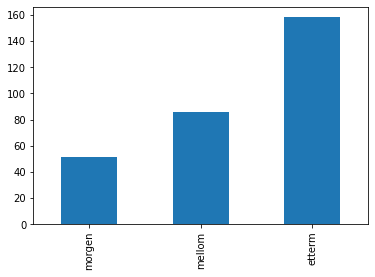

In [9]:
#lager en gjennomsnits tabell ved å ta mean av hele tabellen og printer den til en bar
df_new_mean = df_new.mean(skipna=True)
df_new_mean.plot.bar()